In [1]:
import zarr
from scipy.spatial.distance import squareform
import anjl

## Small

In [2]:
small = zarr.load("../data/small/dist.zarr.zip")
small_D = squareform(small)
small_D.shape

(181, 181)

In [3]:
small_Z = anjl.canonical_nj(small_D)

In [4]:
small_Z_r = anjl.rapid_nj(small_D)

In [5]:
%%timeit -r20 -n1
anjl.canonical_nj(small_D)

3.42 ms ± 235 μs per loop (mean ± std. dev. of 20 runs, 1 loop each)


In [6]:
%%timeit -r20 -n1
anjl.rapid_nj(small_D)

9.61 ms ± 2.06 ms per loop (mean ± std. dev. of 20 runs, 1 loop each)


In [7]:
%%timeit -r20 -n1
anjl.rapid_nj(small_D, gc=None)

9.63 ms ± 1.67 ms per loop (mean ± std. dev. of 20 runs, 1 loop each)


## Medium

In [8]:
medium = zarr.load("../data/medium/dist.zarr.zip")
medium_D = squareform(medium)
medium_D.shape

(472, 472)

In [9]:
medium_Z = anjl.canonical_nj(medium_D)

In [10]:
medium_Z_r = anjl.rapid_nj(medium_D)

In [11]:
%%timeit -r20 -n1
anjl.canonical_nj(medium_D)

43.9 ms ± 5.91 ms per loop (mean ± std. dev. of 20 runs, 1 loop each)


In [12]:
%%timeit -r20 -n1
anjl.rapid_nj(medium_D)

73.3 ms ± 5.53 ms per loop (mean ± std. dev. of 20 runs, 1 loop each)


In [13]:
%%timeit -r20 -n1
anjl.rapid_nj(medium_D, gc=10)

72.6 ms ± 8.51 ms per loop (mean ± std. dev. of 20 runs, 1 loop each)


In [13]:
%%timeit -r20 -n1
anjl.rapid_nj(medium_D, gc=None)

89.8 ms ± 5.4 ms per loop (mean ± std. dev. of 20 runs, 1 loop each)


In [14]:
%%timeit -r20 -n1
anjl.rapid_nj(medium_D, gc=1)

217 ms ± 47.7 ms per loop (mean ± std. dev. of 20 runs, 1 loop each)


## Large

In [15]:
large = zarr.load("../data/large/dist.zarr.zip")
large_D = squareform(large)
large_D.shape

(3081, 3081)

In [16]:
large_Z, timings_canonical = anjl.canonical_nj(
    large_D,
    # progress=tqdm,
    # progress_options=dict(desc="Compute neighbour-joining tree"),
    diagnostics=True,
)

In [17]:
200 % 100

0

In [27]:
large_Z, timings_rapid_gc100 = anjl.rapid_nj(
    large_D,
    # progress=tqdm,
    # progress_options=dict(desc="Compute neighbour-joining tree"),
    diagnostics=True,
    gc=100,
)

Compute neighbour-joining tree:   0%|          | 0/3080 [00:00<?, ?it/s]

In [28]:
large_Z, timings_rapid_nogc = anjl.rapid_nj(
    large_D,
    # progress=tqdm,
    # progress_options=dict(desc="Compute neighbour-joining tree"),
    diagnostics=True,
    gc=None,
)

Compute neighbour-joining tree:   0%|          | 0/3080 [00:00<?, ?it/s]

In [29]:
import pandas as pd
import numpy as np

In [30]:
df_canonical = pd.DataFrame(
    {
        "time": timings_canonical,
        "iteration": np.arange(len(timings_canonical)),
        "algorithm": "canonical",
    }
)
df_canonical

,time,iteration,algorithm
0,0.011233,0,canonical
1,0.021886,1,canonical
2,0.015286,2,canonical
3,0.029645,3,canonical
4,0.032767,4,canonical
...,...,...,...
3075,0.000012,3075,canonical
3076,0.000011,3076,canonical
3077,0.000010,3077,canonical
3078,0.000009,3078,canonical


In [31]:
df_rapid_gc100 = pd.DataFrame(
    {
        "time": timings_rapid_gc100,
        "iteration": np.arange(len(timings_rapid_gc100)),
        "algorithm": "rapid_gc100",
    }
)
df_rapid_gc100

,time,iteration,algorithm
0,0.002321,0,rapid_gc100
1,0.000798,1,rapid_gc100
2,0.000487,2,rapid_gc100
3,0.000700,3,rapid_gc100
4,0.000376,4,rapid_gc100
...,...,...,...
3075,0.000143,3075,rapid_gc100
3076,0.000133,3076,rapid_gc100
3077,0.000126,3077,rapid_gc100
3078,0.000130,3078,rapid_gc100


In [32]:
df_rapid_nogc = pd.DataFrame(
    {
        "time": timings_rapid_nogc,
        "iteration": np.arange(len(timings_rapid_nogc)),
        "algorithm": "rapid_nogc",
    }
)
df_rapid_nogc

,time,iteration,algorithm
0,0.000580,0,rapid_nogc
1,0.000428,1,rapid_nogc
2,0.000379,2,rapid_nogc
3,0.000388,3,rapid_nogc
4,0.000381,4,rapid_nogc
...,...,...,...
3075,0.000137,3075,rapid_nogc
3076,0.000143,3076,rapid_nogc
3077,0.000129,3077,rapid_nogc
3078,0.000128,3078,rapid_nogc


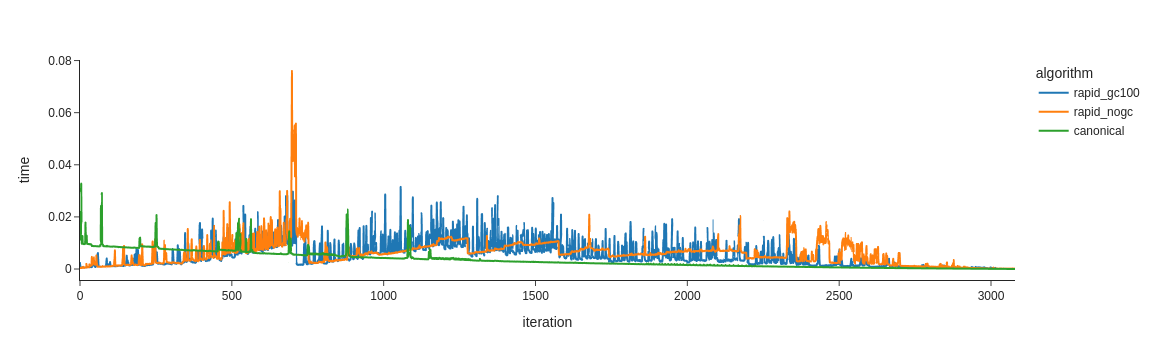

In [33]:
import plotly.express as px

px.line(
    pd.concat([df_rapid_gc100, df_rapid_nogc, df_canonical], axis=0),
    x="iteration",
    y="time",
    color="algorithm",
    template="simple_white",
)

In [25]:
%%timeit -r2 -n1
anjl.canonical_nj(large_D)

11.3 s ± 813 ms per loop (mean ± std. dev. of 2 runs, 1 loop each)


In [26]:
%%timeit -r2 -n1
anjl.rapid_nj(large_D, gc=100)

12.3 s ± 1.1 s per loop (mean ± std. dev. of 2 runs, 1 loop each)
